In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import EngFormatter

In [17]:
lr_df = pd.read_csv(
    'output/a/router.log',
    index_col = 0,
    names = ['time', 'bandwidth'],
    header = None,
    usecols = [0, 1],
)
print(lr_df.index)
lr_df.index = pd.to_datetime(lr_df.index - lr_df.index[0], unit='ms')
print(lr_df.index)

df = pd.read_csv(
    'output/a/send_log/stream.log',
    index_col = 0,
    names = ['time', 'sent'],
    header = None,
    usecols = [0, 1],
)

df['sent'] = df['sent'].apply(lambda x: x * 8)
df.index = pd.to_datetime(df.index - df.index[0], unit='ms')
df = df.resample('1s').sum()

received_df = pd.read_csv(
    'output/a/receive_log/stream.log',
    index_col = 0,
    names = ['time', 'sent'],
    header = None,
    usecols = [0, 1],
)
received_df['sent'] = received_df['sent'].apply(lambda x: x * 8)
received_df.index = pd.to_datetime(received_df.index - received_df.index[0], unit='ms')
received_df = received_df.resample('1s').sum()


# Hack to extend bandwidth limit step function plot until $cc_df.index.max() (end of plot)
lr_last = lr_df.iloc[[-1]]
lr_df = lr_df.append(lr_last)
as_list = lr_df.index.tolist()
as_list[-1] = df.index.max()
lr_df.index = as_list

fig, ax = plt.subplots(figsize=(8,2), dpi=400)

l0, = ax.step(lr_df.index, lr_df.values, where='post', label='Bandwidth')
l1, = ax.plot(df.index, df.values, label='Sent')
l2, = ax.plot(received_df.index, received_df.values, label='Received')

plt.xlabel('time')
plt.ylabel('rate')
ax.legend(handles=[l0, l1, l2])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
ax.yaxis.set_major_formatter(EngFormatter(unit='bit/s'))

Int64Index([1639851327480, 1639851367629, 1639851387772, 1639851407898], dtype='int64', name='time')
DatetimeIndex([       '1970-01-01 00:00:00', '1970-01-01 00:00:40.149000',
               '1970-01-01 00:01:00.292000', '1970-01-01 00:01:20.418000'],
              dtype='datetime64[ns]', name='time', freq=None)


FileNotFoundError: [Errno 2] No such file or directory: 'output/a/send_log/stream.log'

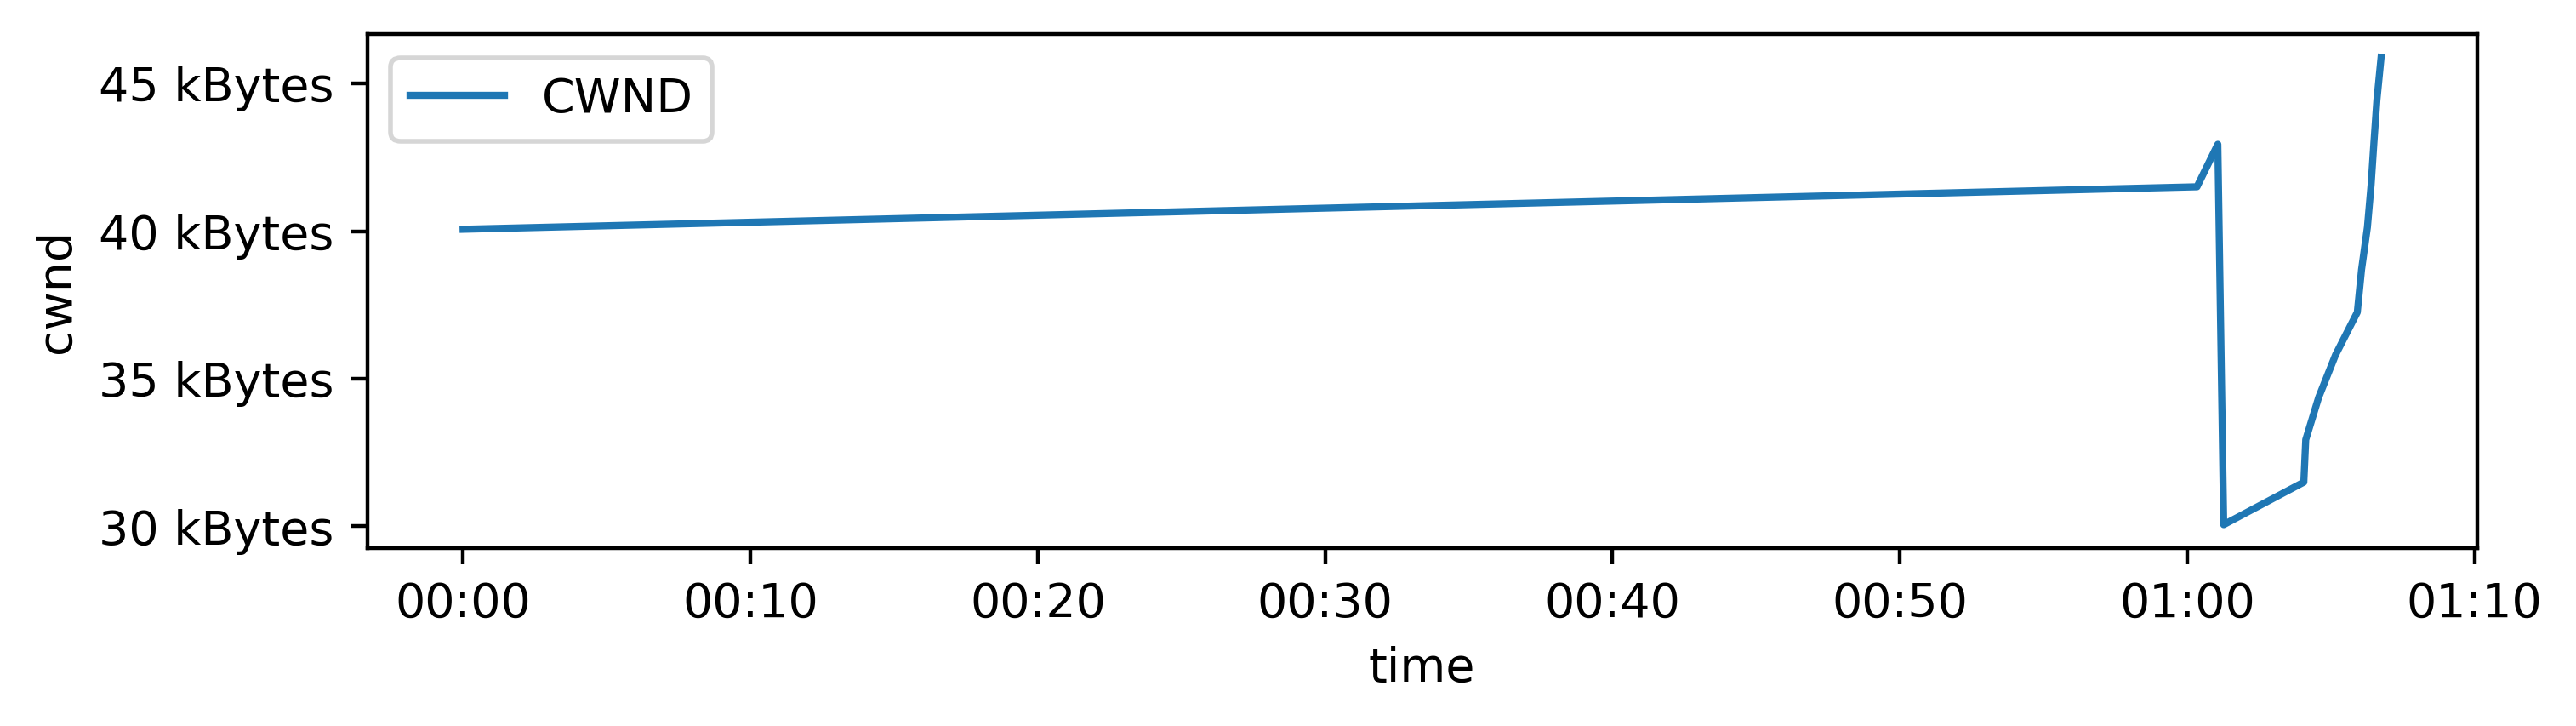

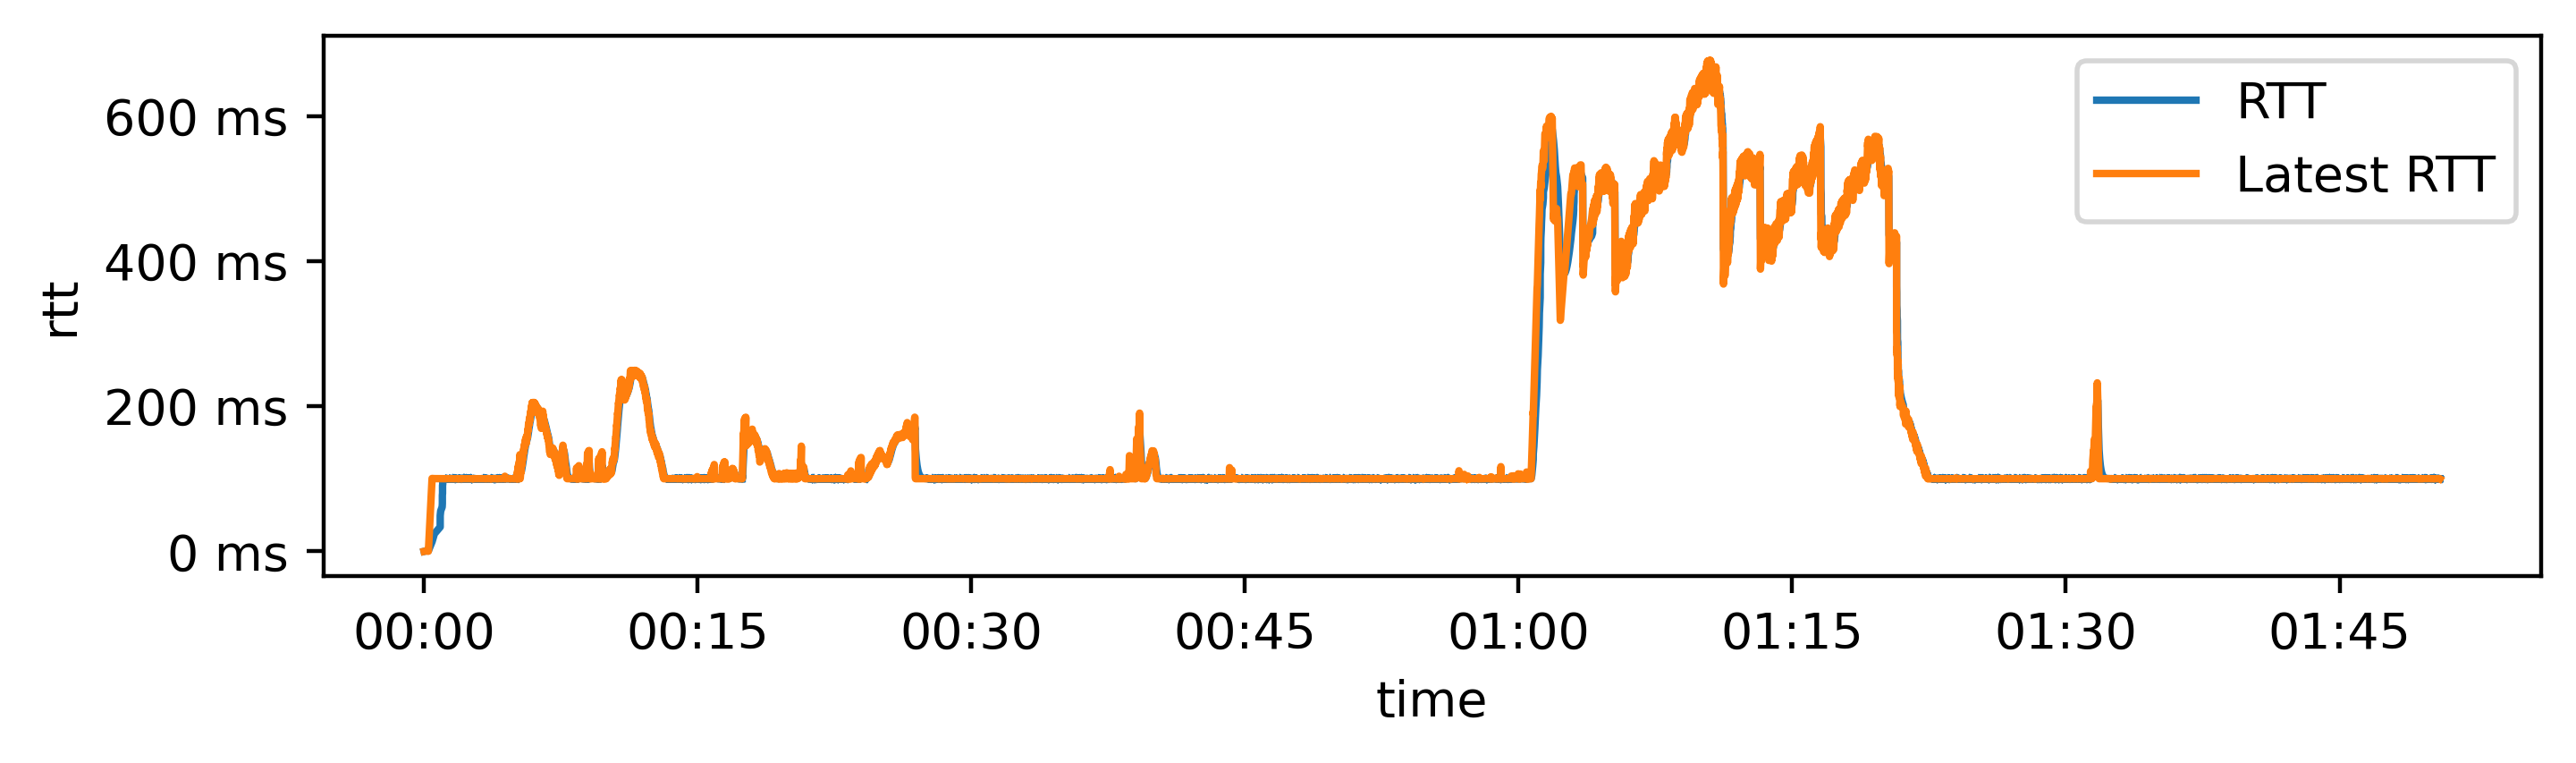

In [15]:
congestion = []

with open('output/a/send_log/29e851f00991759e1c8a2e347f2e220f726900.qlog') as f:
    for index, line in enumerate(f):
        event = json.loads(line.strip())
        if 'name' in event and event['name'] == 'recovery:metrics_updated':
            if 'data' in event and 'congestion_window' in event['data']:
                congestion.append({'time': event['time'], 'cwnd': event['data']['congestion_window']})



df = pd.DataFrame(congestion)
df.index = pd.to_datetime(df['time'], unit='ms')

fig, ax = plt.subplots(figsize=(8,2), dpi=400)

l0, = ax.plot(df.index, df['cwnd'], label='CWND')

plt.xlabel('time')
plt.ylabel('cwnd')
ax.legend(handles=[l0])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
ax.yaxis.set_major_formatter(EngFormatter(unit='Bytes'))


rtt = []

with open('output/a/send_log/29e851f00991759e1c8a2e347f2e220f726900.qlog') as f:
    for index, line in enumerate(f):
        event = json.loads(line.strip())
        if 'name' in event and event['name'] == 'recovery:metrics_updated':
            append = False
            sample = {'time': event['time']}
            if 'data' in event and 'smoothed_rtt' in event['data']:
                sample['smoothed_rtt'] = event['data']['smoothed_rtt']
                append = True
            if 'data' in event and 'min_rtt' in event['data']:
                sample['min_rtt'] = event['data']['min_rtt']
                append = True
            if 'data' in event and 'latest_rtt' in event['data']:
                sample['latest_rtt'] = event['data']['latest_rtt']
                append = True
            if append:
                rtt.append(sample)

df = pd.DataFrame(rtt)
df.index = pd.to_datetime(df['time'], unit='ms')

fig, ax = plt.subplots(figsize=(8,2), dpi=400)

l0, = ax.plot(df.index, df['smoothed_rtt'], label='RTT')
l1, = ax.plot(df.index, df['latest_rtt'], label='Latest RTT')

plt.xlabel('time')
plt.ylabel('rtt')

ax.legend(handles=[l0, l1])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
ax.yaxis.set_major_formatter(EngFormatter(unit='ms'))                

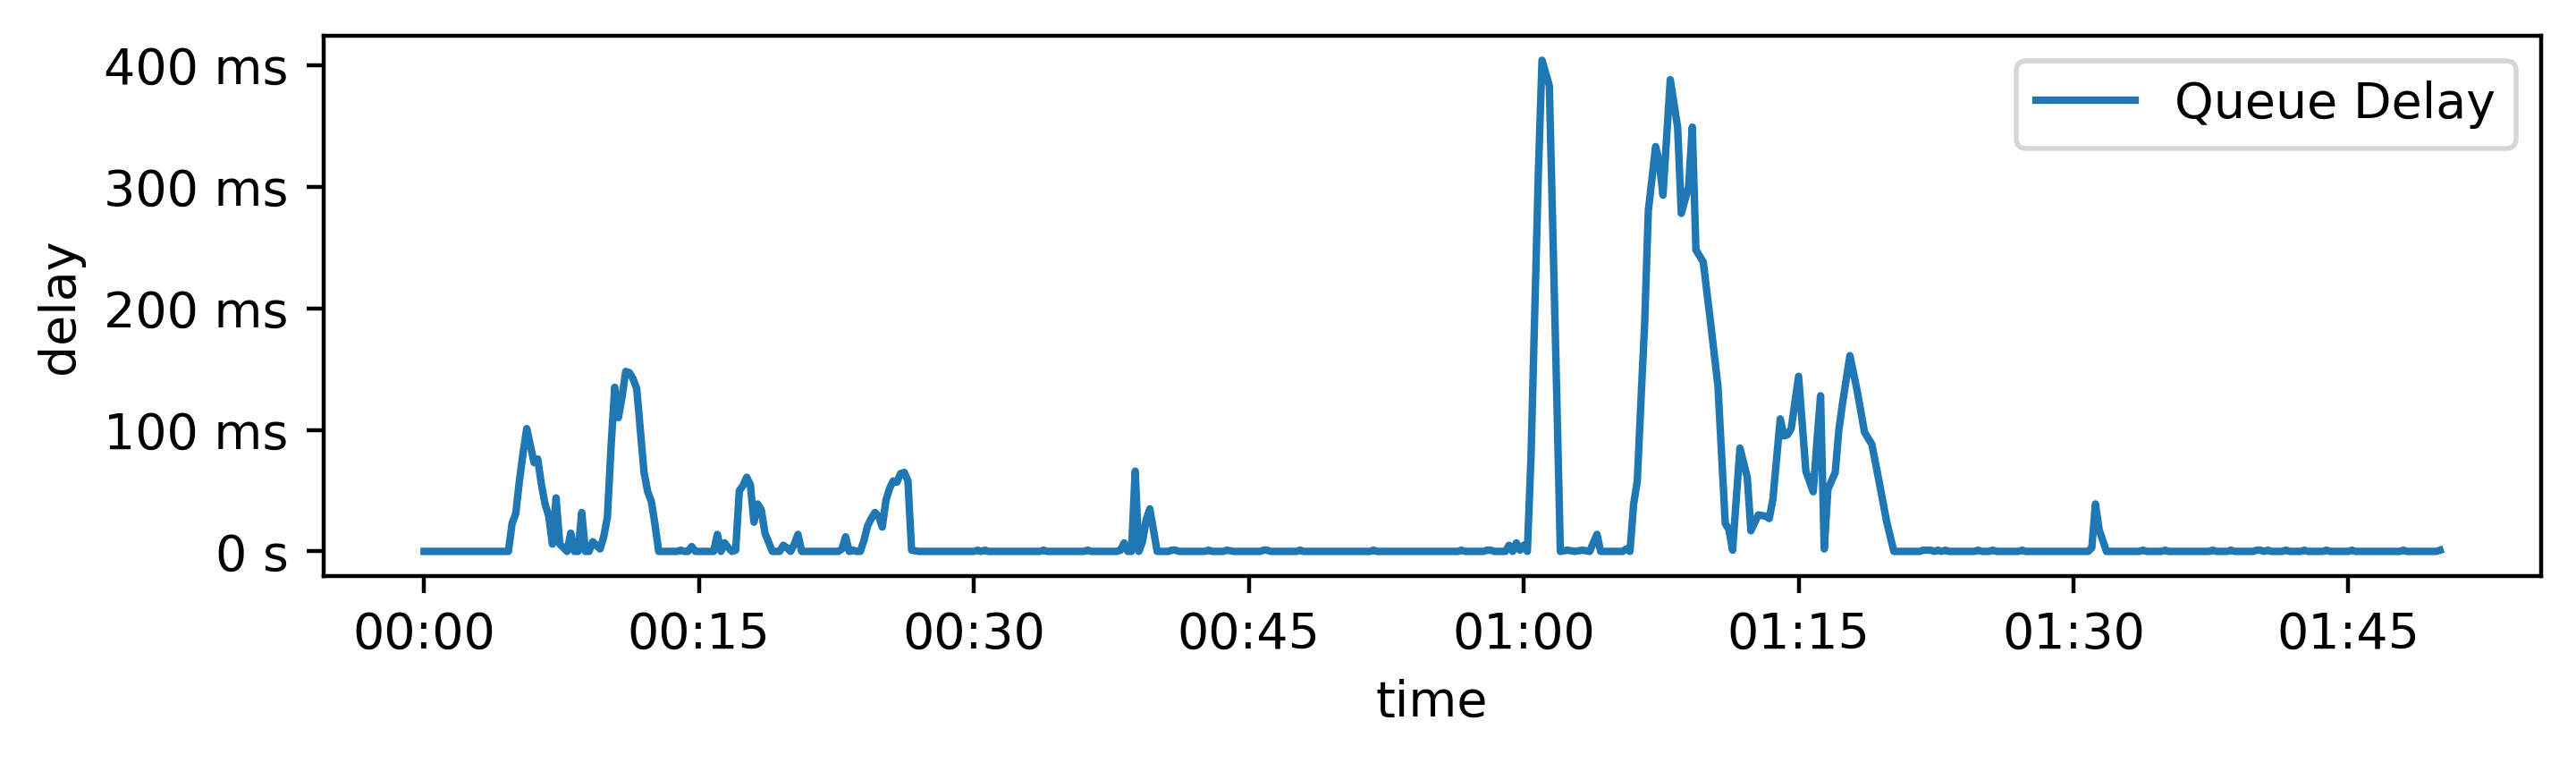

In [16]:
cc_df = pd.read_csv(
    'output/a/send_log/cc.log',
    index_col = 0,
    names = ['time', 'qdelay'],
    header = None,
    usecols = [0, 2],
)

cc_df.index = pd.to_datetime(cc_df.index - cc_df.index[0], unit='ms')


fig, ax = plt.subplots(figsize=(8,2), dpi=400)
l0, = ax.plot(cc_df.index, cc_df['qdelay'], label='Queue Delay')

plt.xlabel('time')
plt.ylabel('delay')

ax.legend(handles=[l0])

ax.xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
ax.yaxis.set_major_formatter(EngFormatter(unit='s'))              

,sum.start,sum.end,sum.seconds,sum.bytes,sum.bits_per_second,sum.omitted,sum.sender
sum.start,,,,,,,
1970-01-01 00:00:00,0.400082,0.600098,0.200016,37648.0,1.506005e+06,0.0,0.0
1970-01-01 00:00:01,1.400187,1.600183,0.199996,47784.0,1.912704e+06,0.0,0.0
1970-01-01 00:00:02,2.400110,2.600145,0.200034,35620.8,1.424784e+06,0.0,0.0
1970-01-01 00:00:03,3.400182,3.600152,0.199970,52417.6,2.097578e+06,0.0,0.0
1970-01-01 00:00:04,4.400070,4.600066,0.199996,44019.2,1.760808e+06,0.0,0.0
...,...,...,...,...,...,...,...
1970-01-01 00:01:56,116.400164,116.600194,0.200030,29539.2,1.181150e+06,0.0,0.0
1970-01-01 00:01:57,117.400172,117.600141,0.199970,57630.4,2.304878e+06,0.0,0.0
1970-01-01 00:01:58,118.400077,118.600073,0.199996,44888.0,1.795556e+06,0.0,0.0


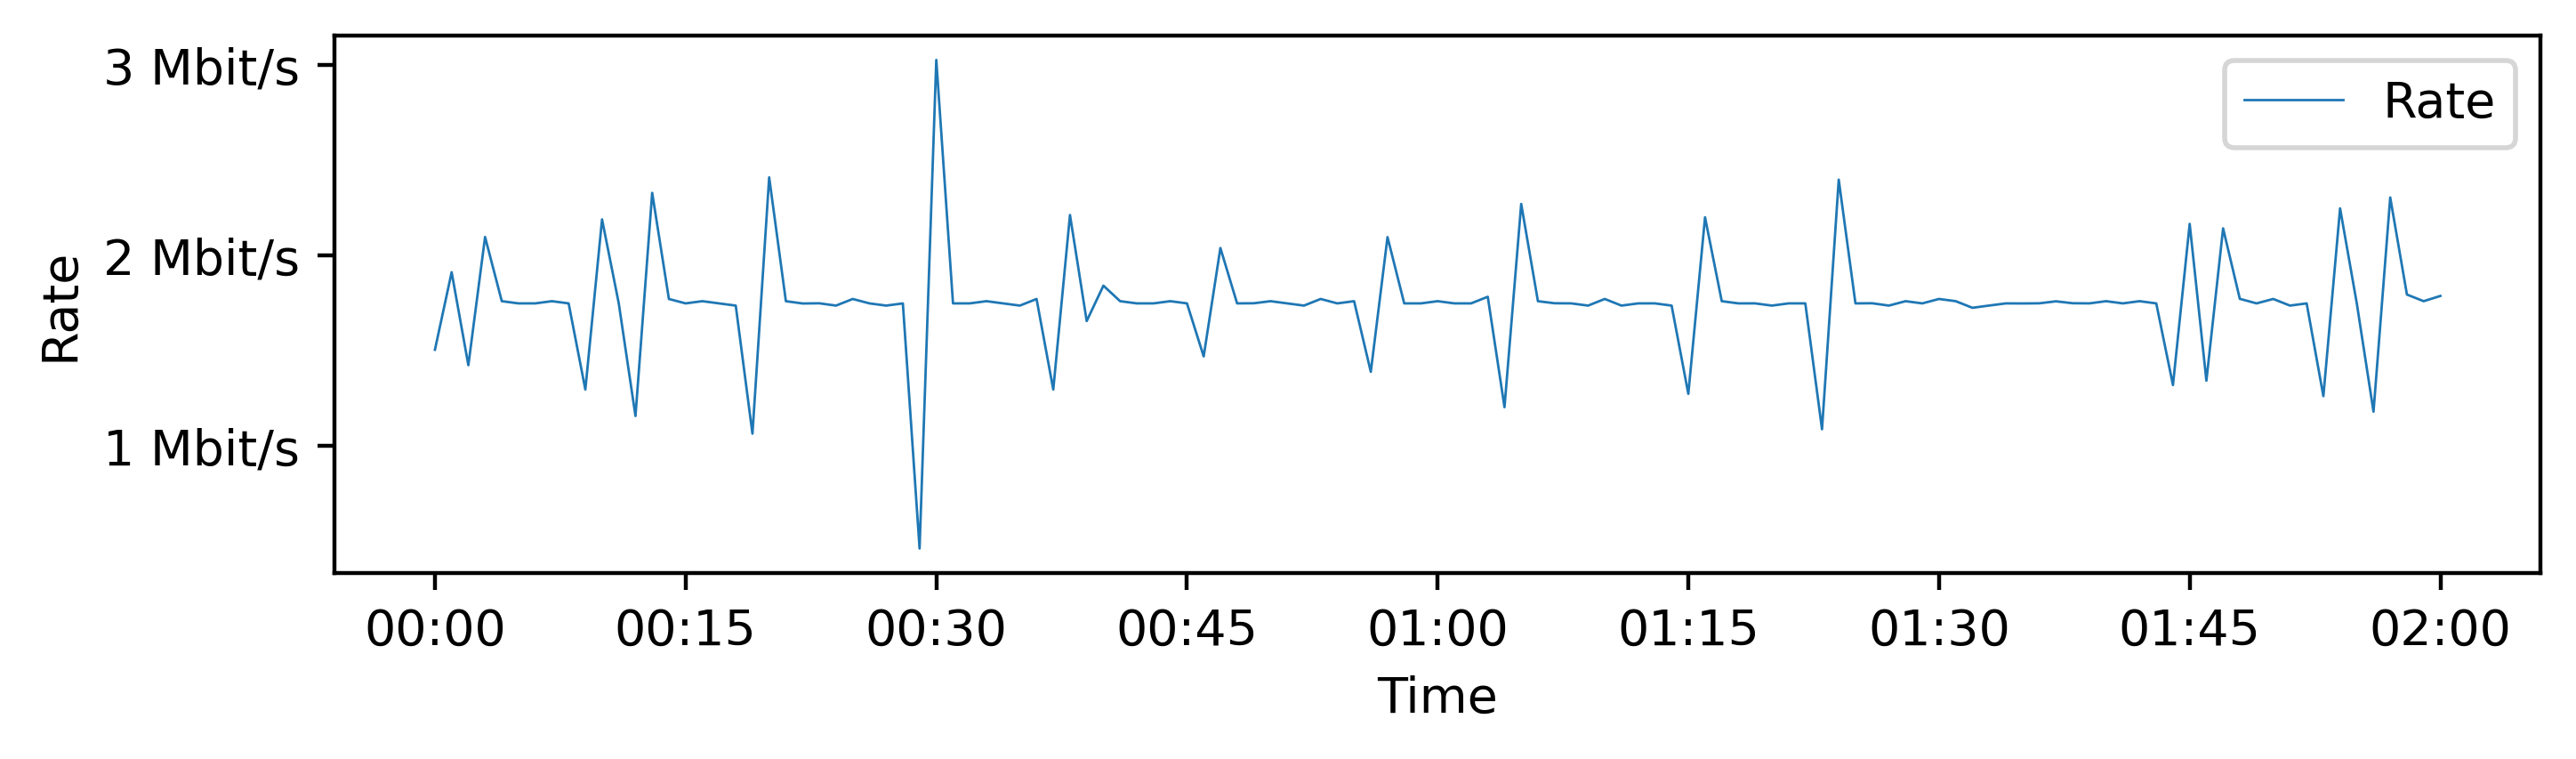

In [104]:
with open('output/tcp/receive_log/tcp.log') as config_file:
    config = json.load(config_file)

# df = pd.DataFrame.from_records(config['intervals'], orient='records')
df = pd.json_normalize(config, record_path='intervals')
df.index = pd.to_datetime(df['sum.start'], unit='s')
df = df.resample('1s').mean()

fig, ax = plt.subplots(figsize=(8,2), dpi=400)
l0, = ax.plot(df.index, df['sum.bits_per_second'], label='Rate', linewidth=0.5)

plt.xlabel('Time')
plt.ylabel('Rate')

ax.legend(handles=[l0])

ax.xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
ax.yaxis.set_major_formatter(EngFormatter(unit='bit/s'))

df